todo: here I compare fit quaility on the unit level - so far I have pearsonr trial avg and sttc trial avg, no sttc concat

In [3]:
import pandas as pd
import numpy as np
# from scipy.optimize import curve_fit, OptimizeWarning
# from sklearn.metrics import r2_score
# from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# import from scripts
import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from calculate_tau import fit_single_exp, fit_single_exp_2d, func_single_exp_monkey
from cfg_global import project_folder_path
os.chdir(current_wd)

In [4]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [5]:
empty_suffix = 'no'
data_folder = project_folder_path + 'results\\monkey\\fixation_period_1000ms_' + empty_suffix + '_empty\\'
results_folder = project_folder_path + 'results\\monkey\\fixation_period_1000ms_' + empty_suffix + '_empty\\'

fig_folder = project_folder_path + 'results\\monkey\\fig_drafts_paper_reduce\\'

### Get the data

In [13]:
area = 'pfdl' 

# pearsonr trial avg
pfdl_pearsonr_trial_avg_df = pd.read_pickle(results_folder + 'binned\\' + area + '\\acf\\acf_pearsonr_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_tau_pearsonr_trial_avg_df = pd.read_pickle(results_folder + 'binned\\' + area + '\\taus\\tau_pearsonr_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')

# sttc trial avg
pfdl_sttc_trial_avg_df = pd.read_pickle(results_folder + 'non_binned\\' + area + '\\acf\\acf_sttc_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_tau_sttc_trial_avg_df = pd.read_pickle(results_folder + 'non_binned\\' + area + '\\taus\\tau_sttc_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')

# sttc trial concat
pfdl_sttc_trial_concat_df = pd.read_pickle(results_folder + 'non_binned\\' + area + '\\acf\\acf_sttc_trial_concat_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_tau_sttc_trial_concat_df = pd.read_pickle(results_folder + 'non_binned\\' + area + '\\taus\\tau_sttc_trial_concat_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')

In [14]:
area = 'pfp' 

# pearsonr trial avg
pfp_pearsonr_trial_avg_df = pd.read_pickle(results_folder + 'binned\\' + area + '\\acf\\acf_pearsonr_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_tau_pearsonr_trial_avg_df = pd.read_pickle(results_folder + 'binned\\' + area + '\\taus\\tau_pearsonr_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')

# sttc trial avg
pfp_sttc_trial_avg_df = pd.read_pickle(results_folder + 'non_binned\\' + area + '\\acf\\acf_sttc_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_tau_sttc_trial_avg_df = pd.read_pickle(results_folder + 'non_binned\\' + area + '\\taus\\tau_sttc_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')

# sttc trial concat
pfp_sttc_trial_concat_df = pd.read_pickle(results_folder + 'non_binned\\' + area + '\\acf\\acf_sttc_trial_concat_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_tau_sttc_trial_concat_df = pd.read_pickle(results_folder + 'non_binned\\' + area + '\\taus\\tau_sttc_trial_concat_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')

### Calc ACF and tau constraints

1. ACF decline within 150-250ms
2. tau > 0

In [9]:
acf_cols = ['acf_' + str(i) for i in range(20)]

In [10]:
def calculate_acf_decline_flag(acf_2d, start_idx=3, end_idx=5):
    decay_l = []
    for i in range(acf_2d.shape[0]):
        decay_l.append(np.all(np.diff(acf_2d[i, start_idx:end_idx]) <= 0))
    return decay_l

In [15]:
# ACF decline within 150-250ms
pfdl_pearsonr_2d = pfdl_pearsonr_trial_avg_df[acf_cols].values
pfdl_pearsonr_2d_acf_decay = calculate_acf_decline_flag(pfdl_pearsonr_2d, start_idx=3, end_idx=5)
pfdl_pearsonr_trial_avg_df.insert(1, 'decline_150_250', pfdl_pearsonr_2d_acf_decay)
#pfdl_pearsonr_trial_avg_df.head(2)

pfdl_sttc_avg_2d = pfdl_sttc_trial_avg_df[acf_cols].values
pfdl_sttc_avg_2d_acf_decay = calculate_acf_decline_flag(pfdl_sttc_avg_2d, start_idx=3, end_idx=5)
pfdl_sttc_trial_avg_df.insert(1, 'decline_150_250', pfdl_sttc_avg_2d_acf_decay)

pfdl_sttc_concat_2d = pfdl_sttc_trial_concat_df[acf_cols].values
pfdl_sttc_concat_2d_acf_decay = calculate_acf_decline_flag(pfdl_sttc_concat_2d, start_idx=3, end_idx=5)
pfdl_sttc_trial_concat_df.insert(1, 'decline_150_250', pfdl_sttc_concat_2d_acf_decay)

pfp_pearsonr_2d = pfp_pearsonr_trial_avg_df[acf_cols].values
pfp_pearsonr_2d_acf_decay = calculate_acf_decline_flag(pfp_pearsonr_2d, start_idx=3, end_idx=5)
pfp_pearsonr_trial_avg_df.insert(1, 'decline_150_250', pfp_pearsonr_2d_acf_decay)
#pfp_pearsonr_trial_avg_df.head(2)

pfp_sttc_avg_2d = pfp_sttc_trial_avg_df[acf_cols].values
pfp_sttc_avg_2d_acf_decay = calculate_acf_decline_flag(pfp_sttc_avg_2d, start_idx=3, end_idx=5)
pfp_sttc_trial_avg_df.insert(1, 'decline_150_250', pfp_sttc_avg_2d_acf_decay)

pfp_sttc_concat_2d = pfp_sttc_trial_concat_df[acf_cols].values
pfp_sttc_concat_2d_acf_decay = calculate_acf_decline_flag(pfp_sttc_concat_2d, start_idx=3, end_idx=5)
pfp_sttc_trial_concat_df.insert(1, 'decline_150_250', pfp_sttc_concat_2d_acf_decay)

In [23]:
# tau > 0 - fillfilled by the fit itself
print(f' pfdl_tau_pearsonr_trial_avg_df tau_ms < 0: {len(pfdl_tau_pearsonr_trial_avg_df.query('tau_ms < 0'))} units')
print(f' pfdl_tau_sttc_trial_avg_df tau_ms < 0: {len(pfdl_tau_sttc_trial_avg_df.query('tau_ms < 0'))} units')
print(f' pfdl_tau_sttc_trial_concat_df tau_ms < 0: {len(pfdl_tau_sttc_trial_concat_df.query('tau_ms < 0'))} units')

print(f' pfp_tau_pearsonr_trial_avg_df tau_ms < 0: {len(pfp_tau_pearsonr_trial_avg_df.query('tau_ms < 0'))} units')
print(f' pfp_tau_sttc_trial_avg_df tau_ms < 0: {len(pfp_tau_sttc_trial_avg_df.query('tau_ms < 0'))} units')
print(f' pfp_tau_sttc_trial_concat_df tau_ms < 0: {len(pfp_tau_sttc_trial_concat_df.query('tau_ms < 0'))} units')

 pfdl_tau_pearsonr_trial_avg_df tau_ms < 0: 0 units
 pfdl_tau_sttc_trial_avg_df tau_ms < 0: 0 units
 pfdl_tau_sttc_trial_concat_df tau_ms < 0: 0 units
 pfp_tau_pearsonr_trial_avg_df tau_ms < 0: 0 units
 pfp_tau_sttc_trial_avg_df tau_ms < 0: 0 units
 pfp_tau_sttc_trial_concat_df tau_ms < 0: 0 units


In [28]:
# subsets for merging and plotting - ACF
pfdl_pearsonr_trial_avg_df_subset = pfdl_pearsonr_trial_avg_df[['unit_id', 'decline_150_250']].copy()
pfdl_pearsonr_trial_avg_df_subset['area'] = 'pfdl'
pfdl_pearsonr_trial_avg_df_subset['method'] = 'pearsonr_trial_avg'
# pfdl_pearsonr_trial_avg_df_subset.head(2)

pfdl_sttc_trial_avg_df_subset = pfdl_sttc_trial_avg_df[['unit_id', 'decline_150_250']].copy()
pfdl_sttc_trial_avg_df_subset['area'] = 'pfdl'
pfdl_sttc_trial_avg_df_subset['method'] = 'sttc_trial_avg'

pfdl_sttc_trial_concat_df_subset = pfdl_sttc_trial_concat_df[['unit_id', 'decline_150_250']].copy()
pfdl_sttc_trial_concat_df_subset['area'] = 'pfdl'
pfdl_sttc_trial_concat_df_subset['method'] = 'sttc_trial_concat'

pfp_pearsonr_trial_avg_df_subset = pfp_pearsonr_trial_avg_df[['unit_id', 'decline_150_250']].copy()
pfp_pearsonr_trial_avg_df_subset['area'] = 'pfp'
pfp_pearsonr_trial_avg_df_subset['method'] = 'pearsonr_trial_avg'
# pfp_pearsonr_trial_avg_df_subset.head(2)

pfp_sttc_trial_avg_df_subset = pfp_sttc_trial_avg_df[['unit_id', 'decline_150_250']].copy()
pfp_sttc_trial_avg_df_subset['area'] = 'pfp'
pfp_sttc_trial_avg_df_subset['method'] = 'sttc_trial_avg'

pfp_sttc_trial_concat_df_subset = pfp_sttc_trial_concat_df[['unit_id', 'decline_150_250']].copy()
pfp_sttc_trial_concat_df_subset['area'] = 'pfp'
pfp_sttc_trial_concat_df_subset['method'] = 'sttc_trial_concat'

In [33]:
# subsets for merging and plotting - taus
pfdl_tau_pearsonr_trial_avg_df_subset = pfdl_tau_pearsonr_trial_avg_df[['unit_id', 'tau_ms', 'tau_ci_lower_ms', 'tau_ci_upper_ms','r_squared', 'explained_var']].copy()
pfdl_tau_pearsonr_trial_avg_df_subset['area'] = 'pfdl'
pfdl_tau_pearsonr_trial_avg_df_subset['method'] = 'pearsonr_trial_avg'
#pfdl_tau_pearsonr_trial_avg_df_subset.head(2)

pfdl_tau_sttc_trial_avg_df_subset = pfdl_tau_sttc_trial_avg_df[['unit_id', 'tau_ms', 'tau_ci_lower_ms', 'tau_ci_upper_ms','r_squared', 'explained_var']].copy()
pfdl_tau_sttc_trial_avg_df_subset['area'] = 'pfdl'
pfdl_tau_sttc_trial_avg_df_subset['method'] = 'sttc_trial_avg'

pfdl_tau_sttc_trial_concat_df_subset = pfdl_tau_sttc_trial_concat_df[['unit_id', 'tau_ms', 'tau_ci_lower_ms', 'tau_ci_upper_ms','r_squared', 'explained_var']].copy()
pfdl_tau_sttc_trial_concat_df_subset['area'] = 'pfdl'
pfdl_tau_sttc_trial_concat_df_subset['method'] = 'sttc_trial_concat'

pfp_tau_pearsonr_trial_avg_df_subset = pfp_tau_pearsonr_trial_avg_df[['unit_id', 'tau_ms', 'tau_ci_lower_ms', 'tau_ci_upper_ms','r_squared', 'explained_var']].copy()
pfp_tau_pearsonr_trial_avg_df_subset['area'] = 'pfp'
pfp_tau_pearsonr_trial_avg_df_subset['method'] = 'pearsonr_trial_avg'
#pfp_tau_pearsonr_trial_avg_df_subset.head(2)

pfp_tau_sttc_trial_avg_df_subset = pfp_tau_sttc_trial_avg_df[['unit_id', 'tau_ms', 'tau_ci_lower_ms', 'tau_ci_upper_ms','r_squared', 'explained_var']].copy()
pfp_tau_sttc_trial_avg_df_subset['area'] = 'pfp'
pfp_tau_sttc_trial_avg_df_subset['method'] = 'sttc_trial_avg'

pfp_tau_sttc_trial_concat_df_subset = pfp_tau_sttc_trial_concat_df[['unit_id', 'tau_ms', 'tau_ci_lower_ms', 'tau_ci_upper_ms','r_squared', 'explained_var']].copy()
pfp_tau_sttc_trial_concat_df_subset['area'] = 'pfp'
pfp_tau_sttc_trial_concat_df_subset['method'] = 'sttc_trial_concat'

In [37]:
# merge ACF and taus
pfdl_acf_tau_pearsonr_trial_avg_df = pfdl_pearsonr_trial_avg_df_subset.merge(pfdl_tau_pearsonr_trial_avg_df_subset, 
                                                                             on=['unit_id', 'area', 'method'], how='left')
pfdl_acf_tau_sttc_trial_avg_df = pfdl_sttc_trial_avg_df_subset.merge(pfdl_tau_sttc_trial_avg_df_subset, 
                                                                             on=['unit_id', 'area', 'method'], how='left')
pfdl_acf_tau_sttc_trial_concat_df = pfdl_sttc_trial_concat_df_subset.merge(pfdl_tau_sttc_trial_concat_df_subset, 
                                                                             on=['unit_id', 'area', 'method'], how='left')
#pfdl_acf_tau_pearsonr_trial_avg_df

pfp_acf_tau_pearsonr_trial_avg_df = pfp_pearsonr_trial_avg_df_subset.merge(pfp_tau_pearsonr_trial_avg_df_subset, 
                                                                             on=['unit_id', 'area', 'method'], how='left')
pfp_acf_tau_sttc_trial_avg_df = pfp_sttc_trial_avg_df_subset.merge(pfp_tau_sttc_trial_avg_df_subset, 
                                                                             on=['unit_id', 'area', 'method'], how='left')
pfp_acf_tau_sttc_trial_concat_df = pfp_sttc_trial_concat_df_subset.merge(pfp_tau_sttc_trial_concat_df_subset, 
                                                                             on=['unit_id', 'area', 'method'], how='left')

In [38]:
# concat in one long df
acf_tau_full_df = pd.concat([pfdl_acf_tau_pearsonr_trial_avg_df, pfdl_acf_tau_sttc_trial_avg_df, pfdl_acf_tau_sttc_trial_concat_df, 
                             pfp_acf_tau_pearsonr_trial_avg_df, pfp_acf_tau_sttc_trial_avg_df, pfp_acf_tau_sttc_trial_concat_df])
acf_tau_full_df.reset_index(inplace=True, drop=True)
acf_tau_full_df

,unit_id,decline_150_250,area,method,tau_ms,tau_ci_lower_ms,tau_ci_upper_ms,r_squared,explained_var
0,0,True,pfdl,pearsonr_trial_avg,964.534209,-314.702196,2243.770614,0.911963,0.911963
1,1,False,pfdl,pearsonr_trial_avg,NaN,NaN,NaN,NaN,NaN
2,2,True,pfdl,pearsonr_trial_avg,49.716504,-402.736854,502.169862,0.018581,0.018581
3,3,True,pfdl,pearsonr_trial_avg,304.288860,142.694368,465.883353,0.902339,0.902339
4,4,True,pfdl,pearsonr_trial_avg,180.183037,27.944734,332.421341,0.686497,0.686497
...,...,...,...,...,...,...,...,...,...
3226,538,False,pfp,sttc_trial_concat,191.813486,-81.874134,465.501106,0.444838,0.444838
3227,539,True,pfp,sttc_trial_concat,89.510542,30.878530,148.142554,0.753023,0.753023
3228,540,False,pfp,sttc_trial_concat,53.573381,-19.364730,126.511491,0.447995,0.447995
3229,541,True,pfp,sttc_trial_concat,83.478805,-44.264621,211.222232,0.359884,0.359884


#### Units fullfilling the criteria 

In [42]:
total_counts_df = acf_tau_full_df.groupby('method', as_index=False)['decline_150_250'].count()
total_counts_df.rename(columns={'decline_150_250': 'total_count'}, inplace=True)

units_count_df = acf_tau_full_df.groupby('method', as_index=False)['decline_150_250'].sum()
units_count_df.rename(columns={'decline_150_250': 'true_count'}, inplace=True)

units_df = pd.merge(units_count_df, total_counts_df, on='method')
units_df['percentage'] = (units_df['true_count'] / units_df['total_count']) * 100

units_df

,method,true_count,total_count,percentage
0,pearsonr_trial_avg,708,1077,65.738162
1,sttc_trial_avg,719,1077,66.759517
2,sttc_trial_concat,808,1077,75.023213


In [46]:
color_pearson_trail_avg = 'slategray' 
color_sttc_trail_avg =  '#E97451' 
color_sttc_trail_concat = '#B94E48' 

colors=['slategray', '#E97451', '#B94E48']

In [62]:
save_fig=True

C:\Users\ipochino\AppData\Local\Temp\ipykernel_13180\3659742970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=units_df, x='method', y='percentage', palette=colors)
C:\Users\ipochino\AppData\Local\Temp\ipykernel_13180\3659742970.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat'],


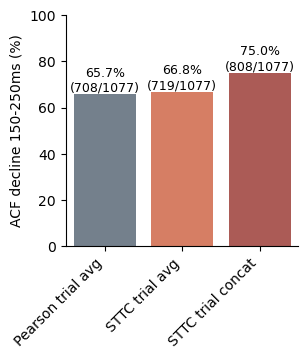

In [78]:
fig, axes = plt.subplots(1, 1, figsize=(3, 3))

sns.barplot(data=units_df, x='method', y='percentage', palette=colors)

axes.set_ylabel('ACF decline 150-250ms (%)')
axes.set_xlabel('')
axes.set_ylim(0, 100)  

axes.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat'], 
                   rotation=45, ha='right')

for p, (true_count, total_count) in zip(axes.patches, zip(units_df['true_count'], units_df['total_count'])):
    percentage = p.get_height()
    axes.annotate(f'{percentage:.1f}%\n({true_count}/{total_count})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'criteria2_all_units.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'criteria2_all_units.svg', bbox_inches='tight')

#### Quality metrics

C:\Users\ipochino\AppData\Local\Temp\ipykernel_13180\938529379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes, x='method', y='r_squared', data=acf_tau_full_df, cut=0, density_norm='width', palette=colors)
C:\Users\ipochino\AppData\Local\Temp\ipykernel_13180\938529379.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat'],


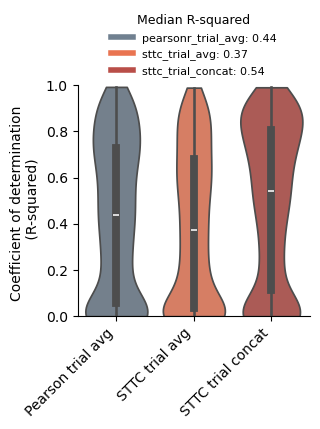

In [81]:
fig, axes = plt.subplots(1, 1, figsize=(3, 3))

sns.violinplot(ax=axes, x='method', y='r_squared', data=acf_tau_full_df, cut=0, density_norm='width', palette=colors)
axes.set_ylabel('Coefficient of determination \n (R-squared)')
axes.set_xlabel('')
axes.set_ylim(0, 1)  
axes.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat'], 
                   rotation=45, ha='right')

# Compute mean R-squared for each method
mean_r2 = acf_tau_full_df.groupby('method')['r_squared'].median()

# Create legend labels
legend_labels = [f"{method}: {mean_r2:.2f}" for method, mean_r2 in mean_r2.items()]

# Add legend on top
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
legend = axes.legend(handles, legend_labels, title="Median R-squared", loc='upper center',
                     bbox_to_anchor=(0.5, 1.35), fontsize=8, title_fontsize=9, ncol=1, frameon=False)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'rsquared_all_units.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'rsquared_all_units.svg', bbox_inches='tight')

C:\Users\ipochino\AppData\Local\Temp\ipykernel_13180\2464279149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes, x='method', y='r_squared', data=acf_tau_full_df.query('decline_150_250 == True'),
C:\Users\ipochino\AppData\Local\Temp\ipykernel_13180\2464279149.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat'],


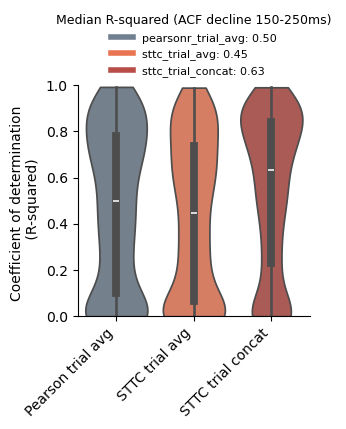

In [82]:
fig, axes = plt.subplots(1, 1, figsize=(3, 3))

sns.violinplot(ax=axes, x='method', y='r_squared', data=acf_tau_full_df.query('decline_150_250 == True'), 
               cut=0, density_norm='width', palette=colors)
axes.set_ylabel('Coefficient of determination \n (R-squared)')
axes.set_xlabel('')
axes.set_ylim(0, 1)  
axes.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat'], 
                   rotation=45, ha='right')

# Compute mean R-squared for each method
mean_r2 = acf_tau_full_df.query('decline_150_250 == True').groupby('method')['r_squared'].median()

# Create legend labels
legend_labels = [f"{method}: {mean_r2:.2f}" for method, mean_r2 in mean_r2.items()]

# Add legend on top
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
legend = axes.legend(handles, legend_labels, title="Median R-squared (ACF decline 150-250ms)", loc='upper center',
                     bbox_to_anchor=(0.5, 1.35), fontsize=8, title_fontsize=9, ncol=1, frameon=False)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'rsquared_acf_decline_units.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'rsquared_acf_decline_units.svg', bbox_inches='tight')

In [87]:
acf_tau_full_df['tau_ms_log_10'] = np.log10(acf_tau_full_df['tau_ms'])
acf_tau_full_df

,unit_id,decline_150_250,area,method,tau_ms,tau_ci_lower_ms,tau_ci_upper_ms,r_squared,explained_var,tau_ms_log_10
0,0,True,pfdl,pearsonr_trial_avg,964.534209,-314.702196,2243.770614,0.911963,0.911963,2.984318
1,1,False,pfdl,pearsonr_trial_avg,NaN,NaN,NaN,NaN,NaN,NaN
2,2,True,pfdl,pearsonr_trial_avg,49.716504,-402.736854,502.169862,0.018581,0.018581,1.696501
3,3,True,pfdl,pearsonr_trial_avg,304.288860,142.694368,465.883353,0.902339,0.902339,2.483286
4,4,True,pfdl,pearsonr_trial_avg,180.183037,27.944734,332.421341,0.686497,0.686497,2.255714
...,...,...,...,...,...,...,...,...,...,...
3226,538,False,pfp,sttc_trial_concat,191.813486,-81.874134,465.501106,0.444838,0.444838,2.282879
3227,539,True,pfp,sttc_trial_concat,89.510542,30.878530,148.142554,0.753023,0.753023,1.951874
3228,540,False,pfp,sttc_trial_concat,53.573381,-19.364730,126.511491,0.447995,0.447995,1.728949
3229,541,True,pfp,sttc_trial_concat,83.478805,-44.264621,211.222232,0.359884,0.359884,1.921576


In [100]:
acf_tau_full_df.to_pickle(results_folder + 'acf_tau_full_df.pkl')
acf_tau_full_df.to_csv(results_folder + 'acf_tau_full_df.csv')

In [ ]:
acf_tau_full_df.query()

C:\Users\ipochino\AppData\Local\Temp\ipykernel_13180\305921427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes, x='method', y='tau_ms_log_10', data=acf_tau_full_df.query('decline_150_250 == True'),
C:\Users\ipochino\AppData\Local\Temp\ipykernel_13180\305921427.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat'],


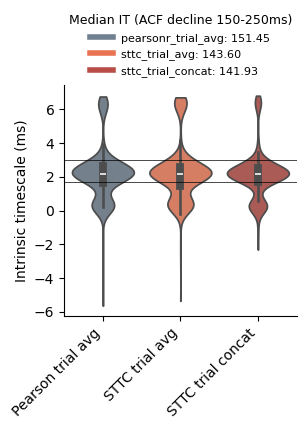

In [95]:
fig, axes = plt.subplots(1, 1, figsize=(3, 3))

sns.violinplot(ax=axes, x='method', y='tau_ms_log_10', data=acf_tau_full_df.query('decline_150_250 == True'), 
               cut=0, density_norm='width', palette=colors)
axes.axhline(y=np.log10(1000), lw=0.5, c='k')
axes.axhline(y=np.log10(50), lw=0.5, c='k')
axes.set_ylabel('Intrinsic timescale (ms)')
axes.set_xlabel('')
#axes.set_ylim(0, 1)  
axes.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat'], 
                   rotation=45, ha='right')
#axes.set_yscale('log')

# Compute mean R-squared for each method
mean_r2 = acf_tau_full_df.query('decline_150_250 == True').groupby('method')['tau_ms'].median()

# Create legend labels
legend_labels = [f"{method}: {mean_r2:.2f}" for method, mean_r2 in mean_r2.items()]

# Add legend on top
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
legend = axes.legend(handles, legend_labels, title="Median IT (ACF decline 150-250ms)", loc='upper center',
                     bbox_to_anchor=(0.5, 1.35), fontsize=8, title_fontsize=9, ncol=1, frameon=False)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'it_decline_units.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'it_decline_units.svg', bbox_inches='tight')

C:\Users\ipochino\AppData\Local\Temp\ipykernel_13180\3891419961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes, x='method', y='tau_ms_log_10', data=acf_tau_full_df,
C:\Users\ipochino\AppData\Local\Temp\ipykernel_13180\3891419961.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat'],


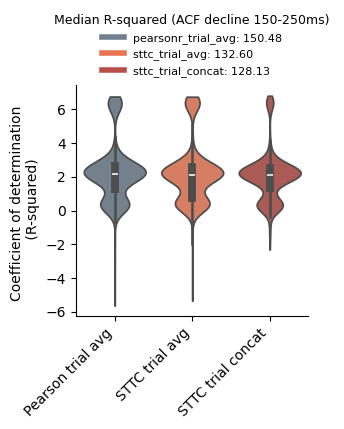

In [89]:
fig, axes = plt.subplots(1, 1, figsize=(3, 3))

sns.violinplot(ax=axes, x='method', y='tau_ms_log_10', data=acf_tau_full_df, 
               cut=0, density_norm='width', palette=colors)
axes.set_ylabel('Coefficient of determination \n (R-squared)')
axes.set_xlabel('')
#axes.set_ylim(0, 1)  
axes.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat'], 
                   rotation=45, ha='right')
#axes.set_yscale('log')

# Compute mean R-squared for each method
mean_r2 = acf_tau_full_df.groupby('method')['tau_ms'].median()

# Create legend labels
legend_labels = [f"{method}: {mean_r2:.2f}" for method, mean_r2 in mean_r2.items()]

# Add legend on top
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
legend = axes.legend(handles, legend_labels, title="Median R-squared (ACF decline 150-250ms)", loc='upper center',
                     bbox_to_anchor=(0.5, 1.35), fontsize=8, title_fontsize=9, ncol=1, frameon=False)

sns.despine()

In [99]:
# Count total rows per method
total_counts = acf_tau_full_df.query('decline_150_250 == True').groupby('method').size()

# Count rows where tau_ms > 1000 per method
above_1000_counts = acf_tau_full_df.query('decline_150_250 == True and tau_ms > 1000').groupby('method').size()

# Compute percentage
percentage_above_1000 = (above_1000_counts / total_counts) * 100

# Convert to a DataFrame for better readability
percentage_above_1000_df = percentage_above_1000.reset_index(name='percentage_tau_ms_above_1000')

# Display result
percentage_above_1000_df

,method,percentage_tau_ms_above_1000
0,pearsonr_trial_avg,11.581921
1,sttc_trial_avg,15.855355
2,sttc_trial_concat,10.396040


### Plots

In [ ]:
n_sttc_better = len(tau_acf_df_merged.query('diff > 0'))
n_sttc_better_perc = n_sttc_better / len(tau_acf_df_merged) * 100

fig, axes = plt.subplots(1,3, figsize=(12,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.histplot(ax=axes[0], x=tau_acf_df_merged['r_squared_pear'].values, y=tau_acf_df_merged['r_squared_sttc'].values, bins=200)
axes[0].plot([0, 1], [0, 1], c='k', transform=axes[0].transAxes)
axes[0].set_aspect('equal', adjustable='box')
axes[0].set_xlabel('Pearson R-squared')
axes[0].set_ylabel('STTC R-squared')
axes[0].set_title('binned')

sns.scatterplot(ax=axes[1], x=tau_acf_df_merged['r_squared_pear'].values, y=tau_acf_df_merged['r_squared_sttc'].values, s=2)
axes[1].plot([0, 1], [0, 1], c='k', transform=axes[1].transAxes)
axes[1].set_aspect('equal', adjustable='box')
axes[1].set_xlabel('Pearson R-squared')
axes[1].set_ylabel('STTC R-squared')
axes[1].set_title('scatter')

sns.histplot(ax=axes[2], x=tau_acf_df_merged['diff'].values, stat='probability', bins=100, kde=False, color='steelblue')
axes[2].axvline(x=0, lw=1, c='k')
axes[2].set_xlabel('STTC R-squared - \nPearson R-squared')
axes[2].set_title('{}% STTC fits \nhave higher R-squared'.format(np.round(n_sttc_better_perc,2)))

fig.suptitle('sttc vs pearson, monkey, n = ' + str(len(tau_acf_df_merged)), y=1.15)

sns.despine()

# fig.savefig(results_folder + 'pfdl_sttc_vs_pearson_50ms_20lags.png' , bbox_inches='tight')

In [ ]:
# plots taus
pfdl_tau_acf_pearsonr_df_subset.query('decline_150_250 == True and tau_more_0 == True and tau_ms <= 1000').describe()

In [ ]:
pfp_tau_acf_pearsonr_df_subset.query('decline_150_250 == True and tau_more_0 == True and tau_ms <= 1000').describe()

In [ ]:
pfdl_tau_acf_sttc_df_subset.query('decline_150_250 == True and tau_more_0 == True and tau_ms <= 1000').describe()

In [ ]:
pfp_tau_acf_sttc_df_subset.query('decline_150_250 == True and tau_more_0 == True and tau_ms <= 1000').describe()